In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Árbol de decisión para especies de flores

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/iris/iris.csv")

In [61]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
data.shape

(150, 5)

In [ ]:
# vamos a ver si somos capaces de categorizar la especie la planta de acuerdo a la anchura y longitud de sus sépalos y pétalos

In [63]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

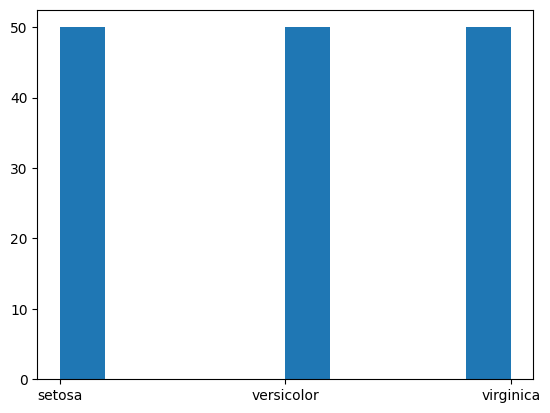

In [64]:
plt.hist(data.Species)

In [67]:
# tenemos las predictoras: long y anchura de pétalos y sépales
# tenemos la objetivo: species

In [65]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [66]:
print(colnames)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']


In [68]:
print(predictors)
print(target)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
Species


In [69]:
data['Sepal.Length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [70]:
for i in data:
    print(data[i])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal.Width, Length: 150, dtype: float64
0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: Petal.Length, Length: 150, dtype: float64
0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: Petal.Width, Length: 150, dtype: float64
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object


In [ ]:
# divido el dateset en fase training y fase de test:

In [71]:
import numpy as np

In [99]:
data["is_train"]=np.random.uniform(0,1, len(data))<=0.75

In [100]:
data["is_train"]

0       True
1      False
2      False
3       True
4       True
       ...  
145    False
146     True
147    False
148    False
149     True
Name: is_train, Length: 150, dtype: bool

<ipython-input-101-b50e5899244f>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.hist(data["is_train"].astype(np.int))


(array([ 33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 117.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

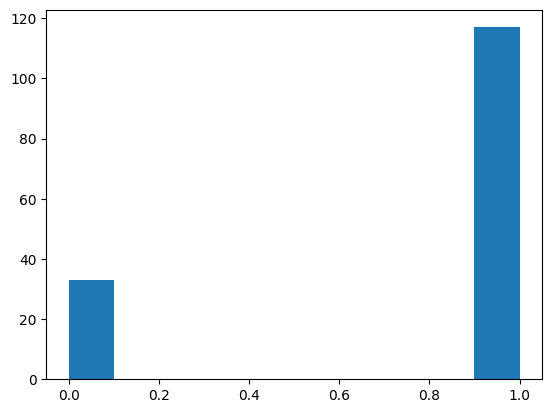

In [101]:
plt.hist(data["is_train"].astype(np.int))

In [103]:
train, test = (data[data["is_train"]== True], data[data["is_train"]==False])

In [104]:
train


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
5,5.4,3.9,1.7,0.4,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
...,...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,virginica,True
143,6.8,3.2,5.9,2.3,virginica,True
144,6.7,3.3,5.7,2.5,virginica,True
146,6.3,2.5,5.0,1.9,virginica,True


In [105]:
train.shape

(117, 6)

In [106]:
test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,False
7,5.0,3.4,1.5,0.2,setosa,False
10,5.4,3.7,1.5,0.2,setosa,False
12,4.8,3.0,1.4,0.1,setosa,False
14,5.8,4.0,1.2,0.2,setosa,False
29,4.7,3.2,1.6,0.2,setosa,False
40,5.0,3.5,1.3,0.3,setosa,False
46,5.1,3.8,1.6,0.2,setosa,False
48,5.3,3.7,1.5,0.2,setosa,False


In [107]:
test.shape

(33, 6)

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
tree = DecisionTreeClassifier(criterion = "entropy", min_samples_split=20, random_state=99)   
 # creamos el arbols. clasificamos con entropia. numero min de elementos para hacer un split=20, es decir, si no hay 20 nodos que no divida (si no ponemos nada por defecto es 2 y nos dará seguramente problemas de overfitting). min_sample_leaf=   , es la cantidad minima de elementos que tenga cada hoja

tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [110]:
preds = tree.predict(test[predictors])

In [111]:
pd.crosstab(test[target],preds,rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,11,1
virginica,0,1,10


In [ ]:
# todas las setosas han sido bien clasificadas
# había 12 versicolor, 11 han sido bien clasificadas, y una mal
# había 11 virginicas, 10 han sido bien clasificadas, y una mal
# a pesar de que ha habido un error, es un error aceptable

In [ ]:
# ahora me falta hacer una representación del arbol

## Visualización del árbol de decisión

In [124]:
# necesito lo primero usar un archivo .dot

In [125]:
from sklearn.tree import export_graphviz

In [ ]:
#indicamos dónde vamos a crear y guardar el fichero .dot

In [129]:
with open("/content/drive/MyDrive/Python Machine Learning JGG/notebooks/resources/iris_decision_tree.dot","w") as dotfile:
    export_graphviz(tree,out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [ ]:
# ahora vamos a representar ese archivo:

In [130]:
import os
from graphviz import Source

In [131]:
file = open("/content/drive/MyDrive/Python Machine Learning JGG/notebooks/resources/iris_decision_tree.dot", "r")
text = file.read()   # lo pasamos a texto
text     # lo mostramos por pantalla

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.585\\nsamples = 117\\nvalue = [40, 38, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 77\\nvalue = [0, 38, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.378\\nsamples = 41\\nvalue = [0, 38, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 37, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 0, 36]"] ;\n2 -> 8 ;\n}'

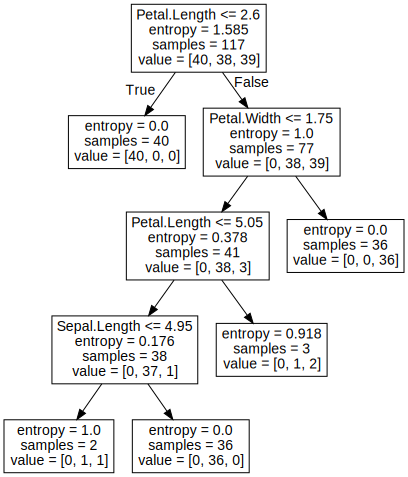

In [132]:
Source(text)

In [ ]:
# las flechas hacia la izq son True
# las flechas hacia la der son False
# cuanto menos sea la entropia mucho mejor

In [ ]:
# recordamos que el orden de las especies es: ['setosa', 'versicolor', 'virginica']

# cómo leemos el arbol:
    # si petal.length <= 2.6 entonces 100% es SETOSA ([40,0,0])
    # si no:
        # si petal.width es >1.75 entonces 100% VIRGINICA ([0,0,36])
        # si petal.width es <=1.75:
            # si petal.length <=5.05 y sepal.length >4.95 entonces 100% VERSICOLOR ([0,36,0])

# sin embargo, si petal.length >2.6, petal.width <=1.75 y petal.length >5.05, entonces dudamos si es VERSICOLOR o VIRGINICA ([0,1,2])
# de manera análoga pasa cuando petal.length >2.6, petal.width <=1.75, petal.length <=5.05, sepal.length <=4.95 entonces dudamos si es VERSICOLOR o VIRGINICA ([0,1,1])

# también podemos decir que la máx. profundidad (o máx. numero de niveles) del arbol es 4 (en 4 hojas, el arbol ha sido capaz de identificar las categorías)

# en todo caso, podemos decir que el arbol es bastante homogeneo.

# tambien podemos decir que las SETOSAS quedan muy bien definidas, nos basta con saber si petal.length es <=2.6

## Cross Validation para la poda

In [ ]:
# en el caso de arriba, hemos puesto que el min_samples_split fuera 20. Pero si hubieramos puesto solo 2 o 3, pues trendríamos un arbol enorme.

In [ ]:
# vamos a ir podando el arbol para que tenga un comportamiento optimo en profundidad.
# vamos a ir podando para no tener problemas de overfitting ni de underfitting
# para ello, la única manera de que al arobol no se acomode a nuestro dataset y sea capad de hacer una predicción global es con el cross validation de todo el dataset

In [165]:
X = data[predictors]
Y = data[target]

In [166]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [167]:
from sklearn.model_selection import KFold

In [168]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)    #n_splits = hacemos 10 grupos de 15 flores, shuffle true para que coja al azar, y random_state = 1 por si lo queremos repetir en casa
cv.get_n_splits(X)

10

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [170]:
scores = cross_val_score(tree, X, Y, scoring=make_scorer(accuracy_score), cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [172]:
score = np.mean(scores)
score

0.9333333333333333

In [ ]:
# nos da un score bastante alto 93%

In [ ]:
# si cambiamos la profundidad maxima (max_depth), obtendremos diferentes eficacias.
# hacemos un bucle que vaya de 1 a 10 y lo vemos:

In [180]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.get_n_splits(X)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=-1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)
    print("")

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]

Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]

Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]

Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]

Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]



In [ ]:
# alcanzamos el máximo en i=3, lo que significa que si dejamos crecer nuestro arbol solo tres niveles desde el nodo raiz, nos va a dar la clasificación más optima

# la lista con cuatro valores muestra lo siguiente

In [175]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [ ]:
# si tuvieramos que quedarnos con una sería con petal.lenght (en la primera lista tiene un 1 y el resto 0)
# en el resto dice que aprox. un 68% de la info la da petal.length y el resto petal.width